In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

In [2]:
ta_q = gpd.read_file("./csv_tables/TA_Quaters_UTM/Quarters.shp")
ta_q.oidrova = pd.to_numeric(ta_q.oidrova, downcast='integer')
ta_q.krova = pd.to_numeric(ta_q.krova, downcast='integer')
display(ta_q.crs)
ta_q

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,oidrova,krova,dateimport,ShapeArea,geometry
0,1,1,01/12/2015 02:28:14,1.301654e+07,"POLYGON ((670795.655 3555762.452, 670797.577 3..."
1,2,2,01/12/2015 02:28:14,8.013404e+06,"POLYGON ((672021.029 3553364.492, 672014.690 3..."
2,3,3,01/12/2015 02:28:14,3.380430e+06,"POLYGON ((668311.070 3552547.701, 668311.229 3..."
3,4,4,01/12/2015 02:28:14,4.510255e+06,"POLYGON ((670771.828 3552544.564, 670771.584 3..."
4,5,6,01/12/2015 02:28:14,2.089044e+06,"POLYGON ((668160.048 3550196.192, 668162.425 3..."
5,6,9,01/12/2015 02:28:14,7.879856e+06,"POLYGON ((668811.121 3546980.368, 668808.698 3..."
6,7,5,01/12/2015 02:28:14,3.024297e+06,"POLYGON ((666698.783 3550619.396, 666701.339 3..."
7,8,8,01/12/2015 02:28:14,3.420996e+06,"POLYGON ((667954.133 3548820.374, 667956.725 3..."
8,9,7,01/12/2015 02:28:14,6.343551e+06,"POLYGON ((665854.540 3548193.053, 665868.137 3..."


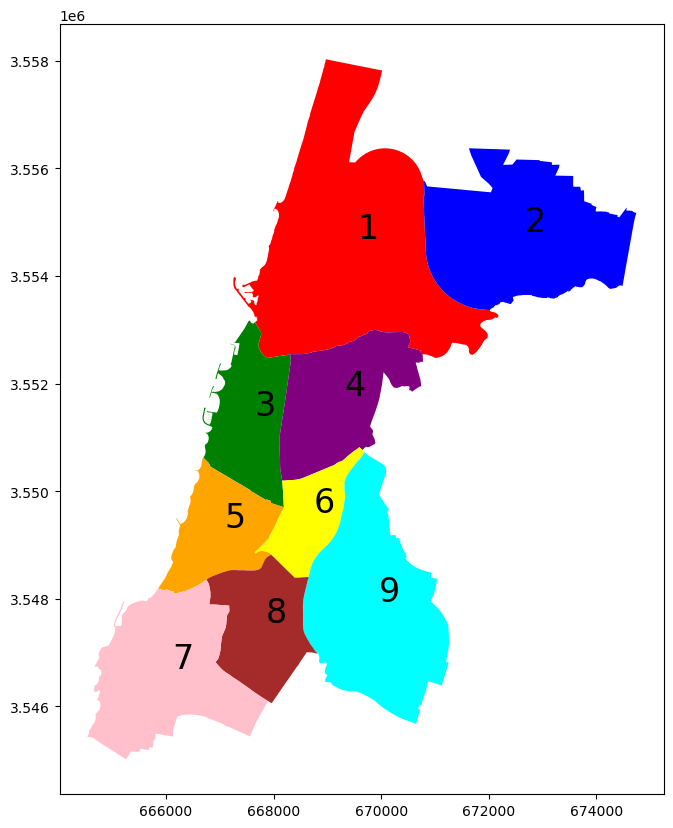

In [3]:
ta_q['index'] = ta_q.index

# Define a list of colors
color_map = {
    1: 'red', 2: 'blue', 3: 'green', 4: 'purple',
    5: 'orange', 6: 'yellow', 7: 'pink', 8: 'brown', 9: 'cyan'
}

# Basic plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each shape with a different color from the list
for idx, row in ta_q.iterrows():
    color = color_map[row['krova']]  # Cycle through the colors list
    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color)

    # Get the centroid of the polygon to place the text
    centroid = row['geometry'].centroid
    ax.annotate(text=row['krova'], xy=(centroid.x, centroid.y), 
                xytext=(3, 3), textcoords="offset points",
                fontsize=24, color='black')

plt.show()

In [4]:
# Exclude micro mobility
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23
micro_m = [SCOOTER, E_BICYCLE, BICYCLE]


In [5]:
# Load original accident data
i_m_h_ta_gdf = gpd.read_parquet('./csv_tables/i_m_h_ta_gdf.parquet')

In [6]:
# Accidents that are not MM
i_m_h_ta_no_mm_gdf = i_m_h_ta_gdf[~(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].copy()

In [7]:
# Accidents that are just MM
i_m_h_ta_mm_gdf =  gpd.read_parquet('./csv_tables/i_m_h_ta_mm_gdf.parquet')
display(i_m_h_ta_mm_gdf.crs)
i_m_h_ta_mm_gdf.head(5)

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,accident_date,geometry
41,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-07-27 01:00:00,POINT (667544.749 3549959.961)
50,2013001742,32013001742,3,3,2,נהג נפגע,0,7,30-34,2,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-10-07 01:30:00,POINT (667286.918 3548726.540)
131,2013001350,12013001350,1,1,2,נהג נפגע,0,5,20-24,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-08-25 01:00:00,POINT (667023.688 3548785.170)
196,2013000147,12013000147,1,1,2,נהג נפגע,0,8,35-39,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,2.0,בינוני,9110323.0,2013-09-19 00:00:00,POINT (668158.751 3551284.678)
197,2013000147,12013000147,1,1,2,נהג נפגע,0,6,25-29,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,2.0,בינוני,9110323.0,2013-09-19 00:00:00,POINT (668158.751 3551284.678)


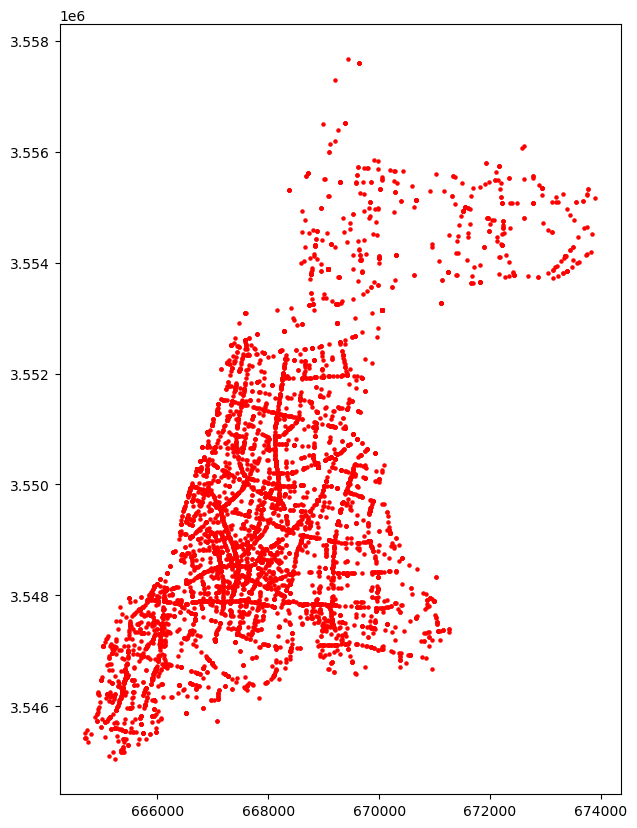

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )
plt.show()

In [9]:
bp_ta_bp_and_meta = gpd.read_parquet('./csv_tables/bp_ta_bp_and_meta.parquet')
bp_ta_bp_and_meta.head(5)

,oid_shvil,msorech,dateimport,create_year,shemmikta,create_date,geometry,width,direction,bitzua,miflas,date_created
0,1,95.10,14/08/2024 02:30:05,2012,נמיר מיוניצ'מן דרומה,None,"LINESTRING (669823.985 3557373.860, 669855.549...",2.5,דו סטרי,2012,None,None
1,2,201.14,14/08/2024 02:30:05,2013,פרופס מנמיר עד קדושי השואה,None,"LINESTRING (669232.834 3555478.027, 669169.381...",2.5,דו סטרי,2013,None,None
2,3,696.31,14/08/2024 02:30:05,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,"LINESTRING (669232.637 3555478.023, 669249.025...",2.1,דו סטרי,2004,None,None
3,4,659.20,14/08/2024 02:30:05,2018,"קק""ל מנמיר עד חיים לבנון",None,"LINESTRING (669354.261 3555417.055, 669410.178...",2.5,דו סטרי,2018,מדרכה,None
4,5,362.67,14/08/2024 02:30:05,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,"LINESTRING (669946.350 3555344.516, 669962.261...",2.0,דו סטרי,2018,None,30/06/2018


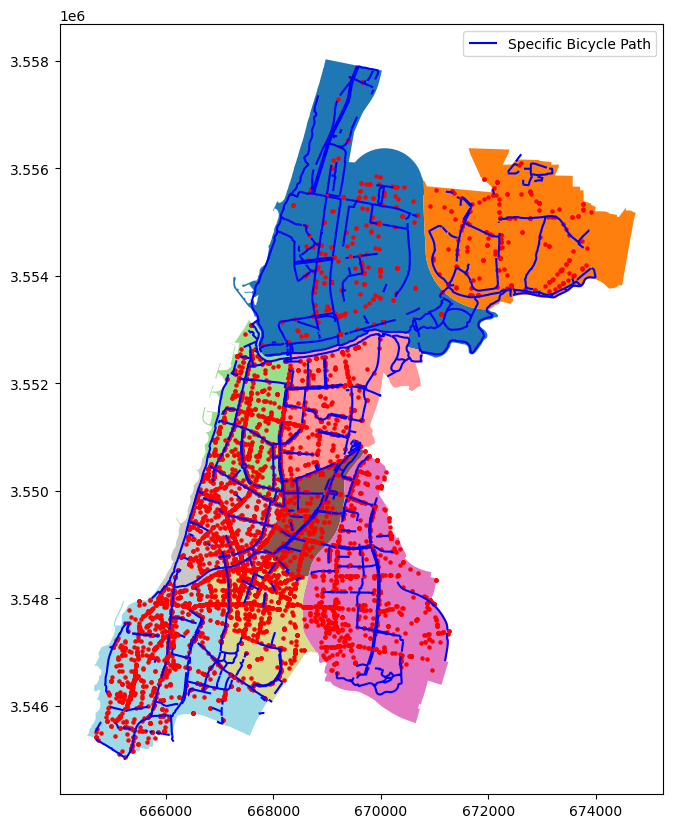

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

ta_q.plot(ax=ax, cmap='tab20', legend=True,)
bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )

plt.legend()
plt.show()

In [11]:
ta_streets = gpd.read_file('./csv_tables/TA_streets_20240724_031704/Streets.shp')
ta_streets

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
0,1.0,915.0,הרוגי מלכות,HARUGEY MALKHOT,336.0,רחוב,0.0,507-10001,قتل مملكة,100.0,"LINESTRING (672865.880 3554095.253, 672895.216..."
1,2.0,0.0,0,UKNOWN,0.0,רחוב,3.0,507-10002,None,100.0,"LINESTRING (666990.498 3551436.940, 667065.337..."
2,3.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10003,أمستردام,100.0,"LINESTRING (667879.712 3551424.162, 667940.741..."
3,4.0,644.0,אלון יגאל,YIG'AL ALLON,2524.0,רחוב,0.0,507-10004,ألون ييغال,200.0,"LINESTRING (669570.036 3550420.535, 669581.404..."
4,5.0,634.0,מרגולין,MARGOLIN,2649.0,רחוב,1.0,507-10005,مارغولين,100.0,"LINESTRING (669329.153 3548322.758, 669409.403..."
...,...,...,...,...,...,...,...,...,...,...,...
8874,9851.0,3007.0,שבטי ישראל,SHIVTEY YISRA'EL,1983.0,רחוב,0.0,507-17843,قبائل إسرائيل,100.0,"LINESTRING (665771.816 3547023.159, 665760.256..."
8875,9852.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20562,Avinri Yitzhak,100.0,"LINESTRING (665585.719 3547178.152, 665627.936..."
8876,9853.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20563,Avinri Yitzhak,100.0,"LINESTRING (665700.142 3547064.296, 665759.119..."
8877,9855.0,3907.0,3907,None,1703.0,רחוב,0.0,507-21960,3907,100.0,"LINESTRING (665087.059 3546677.092, 665075.120..."


#### Loading streets to be matched using intersections

In [12]:
matched_streets_fix_with_intersection = pd.read_csv('./csv_tables/matched_streets_fix_with_intersection.csv')
# matched_streets_fix_with_intersection

ta_streets_to_fix_with_intersection = matched_streets_fix_with_intersection['ta_street'].unique()

i_m_h_streets_to_fix_with_intersection = matched_streets_fix_with_intersection['i_m_h_street_name'].unique()
i_m_h_streets_to_fix_with_intersection,ta_streets_to_fix_with_intersection

(array(['רח 1019', 'רח 1062', 'רח 1081', 'רח 1096', 'רח 1098', 'רח 1103',
        'רח 1104', 'רח 1105', 'רח 1107', 'רח 1108', 'רח 1115', 'רח 1116',
        'רח 1118', 'רח 1174', 'רח 1184', 'רח 1185', 'רח 1188', 'רח 1206',
        'רח 1211', 'רח 1213', 'רח 1223', 'רח 1243', 'רח 1246', 'רח 1254',
        'רח 1260', 'רח 1265', 'רח 1271', 'רח 1274', 'רח 1275', 'רח 1276',
        'רח 1277', 'רח 1278', 'רח 1285', 'רח 1302', 'רח 2003', 'רח 2005',
        'רח 2007', 'רח 2040', 'רח 2080', 'רח 211', 'רח 2139', 'רח 2150',
        'רח 2170', 'רח 2184', 'רח 2185', 'רח 2203', 'רח 2221', 'רח 2222',
        'רח 2224', 'רח 2228', 'רח 2229', 'רח 2232', 'רח 2240', 'רח 2284',
        'רח 2286', 'רח 2287', 'רח 2288', 'רח 2289', 'רח 2290', 'רח 2291',
        'רח 2314', 'רח 2342', 'רח 2355', 'רח 2356', 'רח 2357', 'רח 3040',
        'רח 3053', 'רח 3055', 'רח 3070', 'רח 3071', 'רח 3083', 'רח 3142',
        'רח 3172', 'רח 3175', 'רח 3178', 'רח 3210', 'רח 3226', 'רח 3241',
        'רח 3288', 'רח 3312', 'רח 3320'

In [13]:
i_m_h_ta_gdf_fix_with_intersection = i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew.isin(i_m_h_streets_to_fix_with_intersection)].copy()
# ta_streets_fix_with_intersection = ta_streets[ta_streets.trechov.isin(ta_streets_to_fix_with_intersection)].copy()

ta_streets_buffered = ta_streets.copy()
ta_streets_buffered.geometry = ta_streets_buffered.geometry.buffer(10)
# ta_streets_fix_with_intersection.geometry = ta_streets_fix_with_intersection.geometry.buffer(10)
ta_i_m_h_intersection = gpd.sjoin(ta_streets_buffered, i_m_h_ta_gdf_fix_with_intersection , how='inner', predicate='intersects')

# ta_i_m_h_intersection = gpd.sjoin(ta_streets_fix_with_intersection, i_m_h_ta_gdf_fix_with_intersection , how='inner', predicate='intersects')


ta_i_m_h_intersection

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,...,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,accident_date
14,15.0,347.0,שפירא צבי הרמן,SHAPIRA HERMAN,747.0,רחוב,1.0,507-10017,شابيرو زفي هيرمان,100.0,...,השכרה,1.0,ישראלי,3.0,1.0,עד 1.9,2.0,בינוני,8890345.0,2020-05-19 12:30:00
14,15.0,347.0,שפירא צבי הרמן,SHAPIRA HERMAN,747.0,רחוב,1.0,507-10017,شابيرو زفي هيرمان,100.0,...,None,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,8890345.0,2017-03-22 08:00:00
14,15.0,347.0,שפירא צבי הרמן,SHAPIRA HERMAN,747.0,רחוב,1.0,507-10017,شابيرو زفي هيرمان,100.0,...,None,1.0,ישראלי,1.0,1.0,עד 1.9,1.0,קל,8890345.0,2017-03-22 08:00:00
14,15.0,347.0,שפירא צבי הרמן,SHAPIRA HERMAN,747.0,רחוב,1.0,507-10017,شابيرو زفي هيرمان,100.0,...,None,1.0,ישראלי,1.0,NaN,None,2.0,בינוני,8890345.0,2020-05-19 12:30:00
15,16.0,96.0,פרישמן,FRISHMAN,714.0,רחוב,0.0,507-10018,فريشمان,200.0,...,None,3.0,משטרתי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2015-02-04 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8874,9851.0,3007.0,שבטי ישראל,SHIVTEY YISRA'EL,1983.0,רחוב,0.0,507-17843,قبائل إسرائيل,100.0,...,None,1.0,ישראלי,1.0,1.0,עד 1.9,2.0,בינוני,300732.0,2020-01-01 08:15:00
8874,9851.0,3007.0,שבטי ישראל,SHIVTEY YISRA'EL,1983.0,רחוב,0.0,507-17843,قبائل إسرائيل,100.0,...,None,1.0,ישראלי,3.0,2.0,2.0-2.9,4.0,אין נזק,300732.0,2021-01-13 05:45:00
8874,9851.0,3007.0,שבטי ישראל,SHIVTEY YISRA'EL,1983.0,רחוב,0.0,507-17843,قبائل إسرائيل,100.0,...,None,1.0,ישראלי,1.0,NaN,None,1.0,קל,300732.0,2022-09-06 09:30:00
8874,9851.0,3007.0,שבטי ישראל,SHIVTEY YISRA'EL,1983.0,רחוב,0.0,507-17843,قبائل إسرائيل,100.0,...,None,1.0,ישראלי,3.0,1.0,עד 1.9,1.0,קל,300732.0,2020-01-01 08:15:00


In [14]:
ta_i_m_h_intersection[ta_i_m_h_intersection.trechov == "ח'"]

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,...,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,accident_date


#### Intersecting i_m_h_ta_gpd with ta_streets

In [15]:
# First drop all the duplicates position of accidents
i_m_h_no_geo_dup = i_m_h_ta_gdf.drop_duplicates(subset=['geometry'])

ta_streets_buffered = ta_streets.copy()
ta_streets_buffered.geometry = ta_streets_buffered.geometry.buffer(10)

# intersect ta_streets with i_m_h_no_geo_dup
ta_i_m_h_intersect = gpd.sjoin(i_m_h_no_geo_dup,ta_streets_buffered, how='inner', predicate='intersects')

ta_i_m_h_intersect = ta_i_m_h_intersect.drop_duplicates(subset=['geometry'])

ta_i_m_h_intersect_no_dups = ta_i_m_h_intersect[ta_i_m_h_intersect.trechov != ta_i_m_h_intersect.street1_hebrew].drop_duplicates(subset=['trechov']).copy()

ta_i_m_h_intersect_no_dups

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka
3,2013000194,12013000194,1,1,2,נהג נפגע,2000,7,30-34,2,...,4736.0,31.0,פרנקל ידידיה,FRENKEL,2233.0,רחוב,2.0,507-15484,فرانكل أصدقاء,100.0
7,2013001678,32013001678,3,3,1,נהג,2010,5,20-24,1,...,847.0,788.0,שאול המלך,Sha’ul HaMelekh Blvd,1037.0,שדרות,0.0,507-10989,شول الملك,200.0
11,2013002115,32013002115,3,3,1,נהג,0,99,לא ידוע,0,...,4132.0,8.0,רוטשילד,ROTHSHILD,1103.0,שדרות,0.0,507-14824,روتشيلد,100.0
12,2013001137,12013001137,1,1,1,נהג,2010,5,20-24,1,...,5330.0,361.0,מלצ'ט,MELCHETT,1249.0,רחוב,2.0,507-16168,ميلشت,100.0
13,2013000005,12013000005,1,1,1,נהג,2006,10,45-49,1,...,1527.0,1123.0,הכרמל,HA-CARMEL,1216.0,סמטת,0.0,507-11723,الكرمل,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107884,2023085926,12023085926,1,1,1,נהג,0,99,לא ידוע,0,...,6363.0,3407.0,3407,3407,1927.0,רחוב,3.0,507-17498,3407,100.0
108215,2023088728,32023088728,3,3,1,נהג,0,99,לא ידוע,0,...,1738.0,3296.0,רוחמה,RUCHAMA,1616.0,רחוב,1.0,507-11971,روهاما,100.0
108340,2023094045,12023094045,1,1,2,נהג נפגע,0,5,20-24,1,...,6236.0,4209.0,"ס""ה",SAMECH-HEI,2610.0,רחוב,3.0,507-17314,س.,100.0
108614,2023098372,32023098372,3,3,1,נהג,0,99,לא ידוע,0,...,3280.0,994.0,יפעת,YIF'AT,211.0,רחוב,1.0,507-13836,ييفات,100.0


In [16]:
ta_i_m_h_intersect_no_dups[['trechov','street1_hebrew']]

,trechov,street1_hebrew
3,פרנקל ידידיה,נחלת בנימין
7,שאול המלך,None
11,רוטשילד,שד רוטשילד
12,מלצ'ט,שיינקין
13,הכרמל,הכובשים
...,...,...
107884,3407,סהרון
108215,רוחמה,"אפ""ק"
108340,"ס""ה",הרב אלנקווה
108614,יפעת,מנורה


#### Checking streets

In [17]:
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == 'אורי'][['street1_hebrew','street2_hebrew']]

,street1_hebrew,street2_hebrew


In [18]:
# checking street names:
# אב exists in i_m_h_ta_gdf and ta_streets
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == 'אב'].street1_hebrew
# ta_streets[ta_streets.trechov == 'אב']

# checking * in ta_streets, seems to not have an actual street and not have any accidents, so drop.

# אביגור שאול  can't find it, need to check in map. it's אביגור in ta_streets
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == 'אביגור שאול'].street1_hebrew
# ta_streets[ta_streets.trechov == 'שאול אביגור ']

# אבן ג'אנח is אבן גבירול

# street named 'ו doesn't exists on google maps so this needs to be dropped from ta_streets
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "'ו"].street1_hebrew
# ta_streets[ta_streets.trechov == "ו'"]

# street named: 'ל"א' no such street on google maps correlates to harav yossef tzoberi and part of another street ben sira yaakov
ta_streets[ta_streets.trechov == 'ל"א']
ta_streets[ta_streets.trechov == 'בן-סירה יעקב']
# correct oidrechov of ben-sira yaakov: [6270.0, 6303.0, 6621.0, 6622.0]	

# ta_streets[ta_streets.trechov == 'צוברי יוסף הרב']
# correct oidrechov of tzoberi: [6495.0, 9059.0, 9060.0, 6260.0, 6261.0, 9063.0, 9064.0]  

# street named in ta_streets אוריאל אקוסטה in google uriel da costa, in i_m_h_ta אורי
# אורי relates to לסר אורי
ta_streets[ta_streets.trechov == 'אוריאל אקוסטה']
# no accidents on אוריאל דה קוסטה

# street name it i_m_h_ta אלביטר עבדאלראוף, can't find similar name in ta_streets or google maps
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "אלביטר עבדאלראוף"]

# checking גני יהושע no correlation in ta_streets
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "גני צהלה"]
# so this is a park and has no street correlating to it

# גני צהלה same as גני יהושע these 2 places have 

# דרך אליאב לובה in i_m_h_ta_gpd, in google it's דרך לובה אריה אליאב, it's an underground road with 5 accidents
# checking המצודה in i_m_h_ta_gpd, seems like it not a real street

i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "המצודה"] 
# google maps shows it's in a building area, maybe the accident happened underground.

# המשתלה, seems to be a park, 5 accidents
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "המשתלה"]

# checking הס משה, should be הס
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הס משה"]

# checking הערבה, no street in ta_streets
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הערבה"]
# accident seems to be in a building area, maybe underground

# checking הקישון, no correlated street in ta_streets, there is a street in google maps.
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הקישון"]
# in ta_streets, הקישון correlates to אפרים קישון but the string line goes in to neighboring streets.

# הקריה general building area and not a street

# checking הרצוג In ta_street and הרב חיים הרצוג. there is not הרצוג in google maps, but there is שדרת חיים הרצוג 
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הרצוג"]

# checking in i_m_h_ta_gpd ויקי שירן corresponds to שירן ויקי ד"ר doesn't show in google maps in any variation
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "ויקי שירן"]
# ויקי שירן in i_m_h_ta_gpd is the same place as הערבה, there is also no שירן ויקי ד"ר street in google maps. they will be dropped
# שירן ויקי ד"ר is used as part of הסוללים in google maps, but in apple maps it the same
# ד"ר דליה רביקובי'ץ is 1334 in google maps

# checking חנניה in i_m_h_ta_gpd can't find a correlating street in ta_streets
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "חנניה"]
# it ta_streets חנניה is missing

# checking יואל הנביא  in i_m_h_ta_gpd, is the same as יואל
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "יואל הנביא"]

# checking לאה גולדברג, there's a street in ta_streets called גולדברג and in i_m_h_ta_gpd but there
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "גולדברג"]
# גולדברג exists in google maps, but there is no לאה גולדברג in i_m_h_ta_gpd. לאה גולדברג and לאה are the same

# checking יוסף לוי in i_m_h_ta_gpd,  maybe לוי יוסף גונדר in ta_streets
# it's the same

# checking מוסינזון in i_m_h_ta_gpd 
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew.str.contains('מוסינזון', na=False)].street1_hebrew
# Now checking יגאל מוסינזון which doesn't exists in i_m_h_ta_gpd. after checking, there are no accidents on יגאל מוסינזון
# Now checking מוסנזון בן-ציון דר' that exists in ta_streets, is the same as מוסינזון in ta_streets

# checking בר-כוכבא משה (בריל). it's a weird street that is disjointed in it's parts. in google it's called משה בריל

# checking משעול יעקב from i_m_h_ta_gpd, in ta_streets there is no such street, but there is יעקב

 #checking סטימצקי, it correspond in ta_streets to סטימצקי אביגדור but google maps doesn't show it
 # סטימצקי אביגדור doesn't show properly in google but it does show it another map I have here.

 # checking סמ איתן from i_m_h_ta_gpd, correpsonds to איתן in ta_streets.csv

 # All street with סמ = סמטת and the line string is connected to the main street..kinda stupid by הלמ"ס

 # checking פין from i_m_h_ta_gpd, it's actually פיין

 # checking קהילת קיוב in i_m_h_ta_gpd, it's suppose to be קהילת קייב

# checking ח' from ta_streets seems to be a non existent street on google maps

# need to fix 2291, it doesn't exist in google maps it align to 2 different streets by i_m_h_ta_gpd 
# accidents on רח 2291 align to מארק שאנל and לוי אשכול

# checking רח 2287 on i_m_h_ta_gpd  this street doesn't exists on google maps
# the accidents map to יחזקל שטרייכמן and גלבוע אמיר

# checking רח 2290 it doesn't exist on google maps, it aligns to 2 different streets:
# the accidents maps to גלבוע אמיר and שדרות לוי אשכול

# checking רח 2224 it doesn't exist on google maps, it algins to ירוחם משל

# checking רח 1081 it doesn't exists on google maps, it maps to 2 different streets:
# maps to הסוללים and שלמה קפלן

# checking רח 1096 it exists on google maps, but the accident maps to פנקס
# it doesn't exist in the הלמ"ס


12793     מוסינזון
12794     מוסינזון
103359    מוסינזון
103400    מוסינזון
Name: street1_hebrew, dtype: object

Checking accidents intersection with street

In [19]:
street = ta_streets[ta_streets.trechov == "מוסנזון בן-ציון דר'"].copy()
ta_streets_buffed = ta_streets.copy()
ta_streets_buffed['geometry'] = ta_streets_buffed.geometry.buffer(10)


# Buffer the LineString to create a Polygon
# Adjust the buffer distance as needed (e.g., 10 meters)
street_buffer = street.geometry.buffer(10)

# Create a GeoDataFrame from the buffered geometry
street_polygon = gpd.GeoDataFrame(street, geometry=street_buffer)

# # Ensure both GeoDataFrames have the same CRS
# i_m_h_ta_gdf = i_m_h_ta_gdf.to_crs(street_polygon.crs)

# Perform intersection to find accidents on the street
accidents_on_street = gpd.sjoin(ta_streets_buffed, i_m_h_ta_gdf[i_m_h_ta_gdf.street2_hebrew == "רח 1062"]
, how='inner', op='intersects')

# accidents_on_street = gpd.sjoin(ta_streets_buffed, i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "פין"]
# , how='inner', op='intersects')

# accidents_on_street = gpd.sjoin(i_m_h_ta_gdf, street_polygon,  how='inner', op='intersects')

# Display the results
# accidents_on_street.geometry = accidents_on_street.geometry.buffer(10)
accidents_on_street

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,...,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,accident_date
4121,4198.0,1062.0,יעוד ודרך,None,4033.0,רחוב,0.0,507-14906,المناطق والطريقة,100.0,...,None,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,80150905.0,2016-05-10 00:00:00
4121,4198.0,1062.0,יעוד ודרך,None,4033.0,רחוב,0.0,507-14906,المناطق والطريقة,100.0,...,None,NaN,None,NaN,NaN,None,NaN,None,80150905.0,2016-05-10 00:00:00


In [20]:
accidents_on_street.location_accuracy

4121    1
4121    1
Name: location_accuracy, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


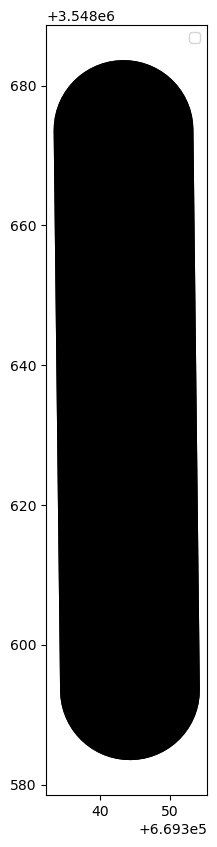

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
accidents_on_street.plot(ax=ax, color='black',linewidth=20)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


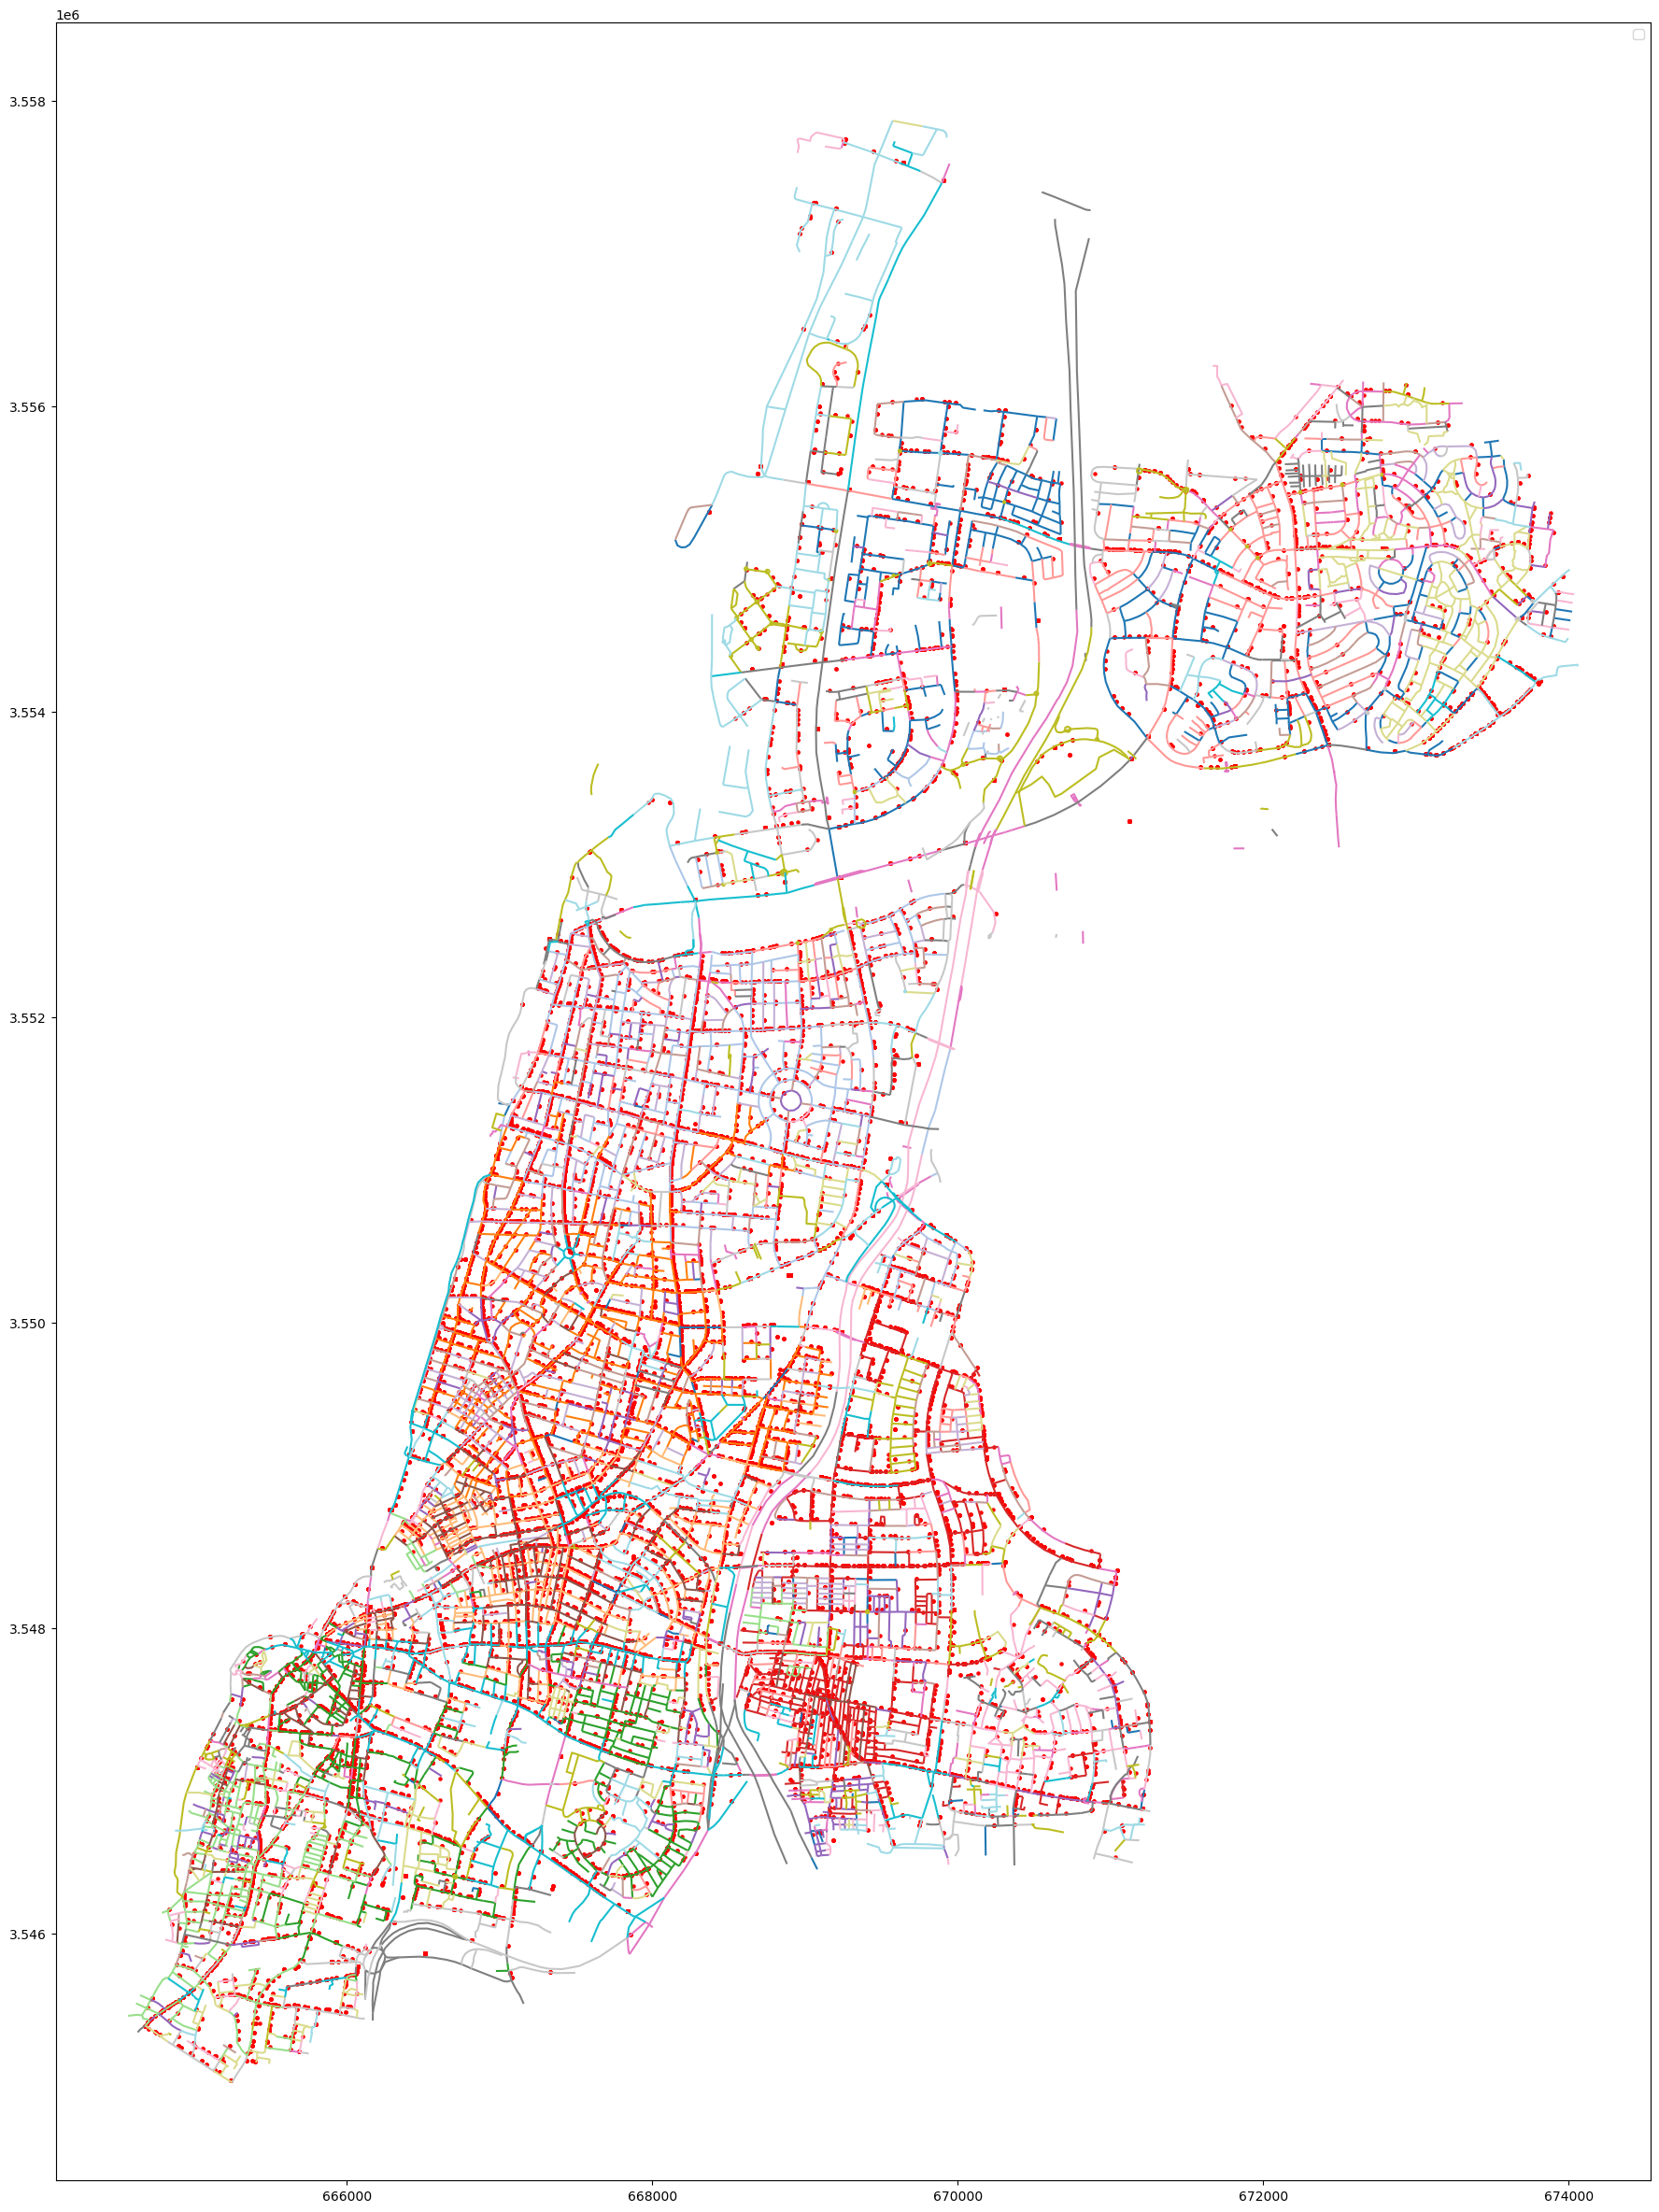

In [22]:

fig, ax = plt.subplots(figsize=(30, 30))
i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "רח 1062"].plot(ax=ax, color='black', marker='o', markersize=25, alpha=0.5 )


ta_streets.plot(ax=ax, cmap='tab20')

# accidents_on_street.plot(ax=ax, color='black', label='Specific Bicycle Path', linewidth=5)
# ta_streets[ta_streets.trechov == "מוסנזון בן-ציון דר'"].plot(ax=ax, color='black',linewidth=5)
# ta_streets[ta_streets.trechov == "ח'"].plot(ax=ax, color='black',linewidth=5)
# ta_streets[ta_streets.trechov == "סטימצקי אביגדור"].plot(ax=ax, color='black',linewidth=5)

# ta_q.plot(ax=ax, cmap='tab20', legend=True,)
# bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
# accidents_on_street.plot(ax=ax, color='black', marker='o', markersize=15 )
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "אורי"].plot(ax=ax, color='black', marker='o', markersize=15 )


plt.legend()
plt.show()

In [1]:
# import geopandas as gpd
# from bokeh.io import output_file, show
# from bokeh.models import HoverTool
# from bokeh.plotting import figure
# from bokeh.models import GeoJSONDataSource
# import json

# # Load your data
# # ta_streets = gpd.read_parquet('your_data.parquet')

# # Convert GeoDataFrame to GeoJSON
# geojson_data = json.loads(ta_streets.to_json())

# # Create GeoJSONDataSource
# geo_source = GeoJSONDataSource(geojson=json.dumps(geojson_data))

# # Create a figure
# p = figure(title="Interactive Map with Bokeh", tools="pan,wheel_zoom,reset", active_scroll='wheel_zoom')

# # Add a hover tool
# hover = HoverTool()
# hover.tooltips = [("Street Name", "@trechov")]
# p.add_tools(hover)

# # Add the streets to the map
# p.patches('xs', 'ys', source=geo_source, fill_color='blue', line_color='black', fill_alpha=0.7)

# # Output to an HTML file and show
# output_file("interactive_map.html")
# show(p)


Almost works

---

Trying leafmap

In [24]:
ta_i_m_h_intersect_no_dups[['trechov','street1_hebrew']].head(10)

,trechov,street1_hebrew
3,פרנקל ידידיה,נחלת בנימין
7,שאול המלך,None
11,רוטשילד,שד רוטשילד
12,מלצ'ט,שיינקין
13,הכרמל,הכובשים
18,הרברט סמואל,רציף הרברט סמואל
23,לוינסקי,שד הר ציון
30,נמיר מרדכי,דרך נמיר מרדכי
36,רוקח נמיר,שד רוקח
37,וולפסון,הרצל


In [25]:
# pip install leafmap

#### Showing street on map with names

In [26]:
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew.str.contains('2291', na=False)][['street1_hebrew','street2_hebrew']]

,street1_hebrew,street2_hebrew


In [27]:
imh_street_ls = i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew.str.contains('2',na=False)]['street1_hebrew'].iloc[10:20].to_list()
imh_street_ls

['רח 2222',
 'רח 4206',
 'רח 3142',
 'רח 3142',
 'רח 3142',
 'רח 428',
 'רח 428',
 'רח 2290',
 'רח 2290',
 'רח 1211']

In [28]:
ta_i_m_h_intersect[ta_i_m_h_intersect.street1_hebrew.isin(imh_street_ls)][['trechov','street1_hebrew']]

,trechov,street1_hebrew
4923,רצאבי זכריה,רח 4206
7121,יריד המזרח,רח 428
8755,כץ בן-ציון,רח 1211
18337,ארצי יצחק,רח 2222
49215,גלבוע אמיר,רח 2290
95794,רצאבי זכריה,רח 4206


In [29]:
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew.str.contains('3',na=False)][['street1_hebrew']].iloc[0:10]

,street1_hebrew
4767,רח 3178
4846,רח 3178
5684,רח 3694
5809,רח 3694
5993,רח 3142
5994,רח 3142
5995,רח 3142
6450,רח 3771
6673,רח 3771
8488,רח 3361


In [30]:
ta_streets[ta_streets.trechov.str.contains('10')]

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
2967,3019.0,1080.0,1080,1080,4036.0,רחוב,3.0,507-13525,1080,100.0,"LINESTRING (670223.174 3548944.103, 670315.622..."
3671,3728.0,1019.0,1019,1019,4031.0,רחוב,0.0,507-14359,1019,100.0,"LINESTRING (669519.969 3548208.312, 669519.273..."
3691,3748.0,1024.0,1024,1024,4032.0,רחוב,0.0,507-14379,1024,100.0,"LINESTRING (669321.733 3548008.565, 669361.102..."
3694,3751.0,1024.0,1024,1024,4032.0,רחוב,0.0,507-14382,1024,100.0,"LINESTRING (669361.102 3548008.729, 669408.011..."
3994,4064.0,1099.0,1099,1099,4039.0,רחוב,3.0,507-14748,1099,100.0,"LINESTRING (668455.309 3549581.538, 668455.636..."
3995,4065.0,1100.0,1100,1100,4040.0,רחוב,3.0,507-14749,1100,100.0,"LINESTRING (668520.543 3549577.370, 668522.914..."
3996,4066.0,1099.0,1099,1099,4039.0,רחוב,3.0,507-14750,1099,100.0,"LINESTRING (668453.201 3549529.848, 668455.309..."
3997,4067.0,1100.0,1100,1100,4040.0,רחוב,3.0,507-14751,1100,100.0,"LINESTRING (668519.218 3549525.196, 668520.543..."
5030,5113.0,1098.0,1098,1098,1566.0,רחוב,2.0,507-15933,1098,100.0,"LINESTRING (668383.859 3549583.609, 668378.574..."
5031,5114.0,1098.0,1098,1098,1566.0,רחוב,2.0,507-15934,1098,100.0,"LINESTRING (668383.046 3549632.583, 668383.859..."


In [31]:
ta_i_m_h_intersect[ta_i_m_h_intersect.trechov.isin(['גלבוע אמיר'])][['trechov','street1_hebrew']]

,trechov,street1_hebrew
21896,גלבוע אמיר,רח 2287
49215,גלבוע אמיר,רח 2290
106213,גלבוע אמיר,לוי אשכול


In [32]:
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew.str.contains('1062', na=False)]

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,accident_date,geometry


In [33]:
ta_streets[ta_streets.trechov.str.contains('מסריק')].trechov.value_counts()

trechov
מסריק    2
Name: count, dtype: int64

In [34]:
import leafmap
import geopandas as gpd

# Load your data
# ta_streets = gpd.read_parquet('your_data.parquet')

# Create a map
m = leafmap.Map(center=(35.0, 35.0), zoom=10)


# Add the GeoDataFrame to the map
# m.add_gdf(accidents_on_street, layer_name="Streets", info_mode='on_hover', hover_style={'fillColor': '#ffaf00', 'color': 'black'})
m.add_gdf(ta_streets[ta_streets.trechov == '3784'], layer_name="Streets", info_mode='on_hover')
# m.add_gdf(i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew.str.contains('3',na=False)].iloc[0:10], layer_name="Streets", info_mode='on_hover', hover_style={'fillColor': '#ffaf00', 'color': 'black'})
# m.add_gdf(i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == 'אורי'].iloc[0:10], layer_name="Streets", info_mode='on_hover', hover_style={'fillColor': '#ffaf00', 'color': 'black'})

# m.add_gdf(ta_i_m_h_intersect_no_dups, layer_name="Streets", hover_cols=['trechov', 'street1_hebrew'], hover_style={'fillColor': '#ffaf00', 'color': 'black'})


# m.add_gdf(ta_i_m_h_intersect[ta_i_m_h_intersect.trechov.isin(['0'])]
# , layer_name="Streets", info_mode='on_hover', 
#           hover_style={'fillColor': '#ffaf00', 'color': 'black'}, 
#           fields=['trechov', 'street1_hebrew'])


# Display the map
m


Map(center=[35.0, 35.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

### Found out that איילון is not in i_m_h_ta_gdf

So I will use the method of intersection to correct street names.

Conclusion:

There are no accidents on AYALON!

In [75]:
ta_streets_buffered = ta_streets.copy()
ta_streets_buffered.geometry = ta_streets_buffered.geometry.buffer(10)
# ta_streets_fix_with_intersection.geometry = ta_streets_fix_with_intersection.geometry.buffer(10)
ta_i_m_h_intersection = gpd.sjoin(i_m_h_ta_gdf, ta_streets_buffered, how='inner', predicate='intersects')

# ta_i_m_h_intersection = gpd.sjoin(ta_streets_fix_with_intersection, i_m_h_ta_gdf_fix_with_intersection , how='inner', predicate='intersects')


ta_i_m_h_intersection

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka
0,2013000873,12013000873,1,1,2,נהג נפגע,1980,11,50-54,1,...,9004.0,3311.0,קבוץ גלויות,Kibbuts Galuiot,2309.0,דרך,0.0,507-17620,بطاقات بريدية Kabbalah,200.0
0,2013000873,12013000873,1,1,2,נהג נפגע,1980,11,50-54,1,...,9000.0,3585.0,חיל השריון,HEIL HASIRYON,2465.0,דרך,0.0,507-12118,فيلق مدرع,200.0
0,2013000873,12013000873,1,1,2,נהג נפגע,1980,11,50-54,1,...,9003.0,3585.0,חיל השריון,HEIL HASIRYON,2465.0,דרך,0.0,507-18111,فيلق مدرع,200.0
0,2013000873,12013000873,1,1,2,נהג נפגע,1980,11,50-54,1,...,6786.0,6200.0,כ.מוולפסון לצפון6200,None,0.0,גשר,0.0,507-18161,بصفته وولفسون إلى الشمال من 6200,50.0
1,2013002190,12013002190,1,1,1,נהג,0,99,לא ידוע,0,...,737.0,496.0,אבן גבירול,IBN GVIROL,1040.0,רחוב,0.0,507-10863,حجر غفيرول,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111405,2024097713,12024097713,1,1,1,נהג,1998,13,60-64,1,...,3070.0,1064.0,בת ציון,BAT TSIYON,2645.0,רחוב,0.0,507-13591,الخفافيش صهيون,100.0
111406,2024099291,32024099291,3,3,1,נהג,0,99,לא ידוע,0,...,7444.0,2106.0,אשכול לוי,LEVI ESHKOL,197.0,רחוב,0.0,507-10270,ضريبة الموضوع,200.0
111407,2024096597,32024096597,3,3,2,נהג נפגע,1993,11,50-54,2,...,8179.0,3000.0,בן צבי,BEN ZVI,2412.0,דרך,0.0,507-12546,بن زفي,200.0
111407,2024096597,32024096597,3,3,2,נהג נפגע,1993,11,50-54,2,...,8062.0,3000.0,בן צבי,BEN ZVI,2412.0,דרך,0.0,507-20736,بن زفي,200.0


Difference between 'trechov','street1_hebrew'

In [81]:
ta_i_m_h_intersection[ta_i_m_h_intersection.street1_hebrew != ta_i_m_h_intersection.trechov][['trechov','street1_hebrew']].drop_duplicates()

,trechov,street1_hebrew
0,חיל השריון,קבוץ גלויות
0,כ.מוולפסון לצפון6200,קבוץ גלויות
3,פרנקל ידידיה,נחלת בנימין
7,שאול המלך,None
10,סוקולוב,בזל
...,...,...
110712,כנפי נשרים,דניאל
110765,"הרנ""ה",בושם
111240,השוק,וולפסון
111250,פנקס דוד צבי,עקיבא אריה


In [84]:
ta_i_m_h_intersection[ta_i_m_h_intersection.trechov.str.contains('אילון')][['trechov','street1_hebrew']]

,trechov,street1_hebrew
